### Projek Analissis Data [Dataset Bike Sharing System]
Projek ini bertujuan untuk menganalisis dan menvisualisasikan trend serta pola penyewaan sepeda 

Nama : Aisyah Fitri
Email : aisyahfitriindar@gmail.com
ID Dicoding : aisyahfitri12

# Menentukan Pertanyaan Bisnis 
Trend dan pola penggunaan sepeda dalam setahun tentunya dipengaruhi oleh berbagai hal, mulai dari waktu, cuaca, musim, hingga hari. Analisis ini akan memfokuskan tujuan untuk menganalisa pola serta trend tersebut berdasarkan Dataset Bike Sharing System yang digunakan dalam analisis ini.

Pertanyaan 1: Bagaimana Trend dan Pola Penyewaan Sepeda pada Tahun 2011 dan 2012?
Pertanyaan 2: Apakah Kondisi Cuaca dan Musim Tertentu Berpengaruh terhadap Tingkat Penyewaan Sepeda?


# Mengimport Semua Library yang digunakan 
Sebelum memulai ke proses analisis tentu saja kita perlu untuk mengimport semua library yang akan kita gunakan dalam projek analisis kali ini. berikut adalah semua library yang akan kita gunakan :

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wraling
Proses selanjutnya adalah proses Ghatering yang meliputi beberapa proses hingga menghasilkan data yang siap divisualisasikan. 

# Ghatering Data
Pada proses ini kita akan membaca dataset yang akan kita analisis. proses ini penting karena merupakan dasar dari proses analisis data  kita

In [3]:
day_df = pd.read_csv('data/day.csv') 
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assesing Data 
Selanjutnya adalah proses Assesing Data, dimana pada proses ini kita akan memeriksa kualitas dan karakteristik data yang ada pada dataset yang kita gunakan

In [5]:
print("5 Baris Pertama Dataset Harian (day_df):\n", day_df.head())
print("\n5 Baris Pertama Dataset Per Jam (hour_df):\n", hour_df.head())
#mengecek 5 baris pertama pada masing masing dataset

5 Baris Pertama Dataset Harian (day_df):
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1

In [6]:
print("\nTipe Data dalam Dataset Harian (day_df):\n", day_df.dtypes)
print("\nTipe Data dalam Dataset Per Jam (hour_df):\n", hour_df.dtypes)
#memeriksa tipe data setiap kolom dari dataset


Tipe Data dalam Dataset Harian (day_df):
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Tipe Data dalam Dataset Per Jam (hour_df):
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [7]:
print("\nJumlah Nilai Hilang di Dataset Harian (day_df):\n", day_df.isnull().sum())
print("\nJumlah Nilai Hilang di Dataset Per Jam (hour_df):\n", hour_df.isnull().sum())
#memerikasa missing value


Jumlah Nilai Hilang di Dataset Harian (day_df):
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Nilai Hilang di Dataset Per Jam (hour_df):
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
print("\nJumlah Baris Duplikat di Dataset Harian (day_df):", day_df.duplicated().sum())
print("\nJumlah Baris Duplikat di Dataset Per Jam (hour_df):", hour_df.duplicated().sum())
#memeriksa duplikat pada dataset


Jumlah Baris Duplikat di Dataset Harian (day_df): 0

Jumlah Baris Duplikat di Dataset Per Jam (hour_df): 0


In [393]:
print("\nStatistik Deskriptif Dataset Harian (day_df):\n", day_df.describe())
#memeriksa statistik dasar dari dataset harian


Statistik Deskriptif Dataset Harian (day_df):
           instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.6

In [9]:
print("\nStatistik Deskriptif Dataset Per Jam (hour_df):\n", hour_df.describe())
#memeriksa statistik dataset perjam


Statistik Deskriptif Dataset Per Jam (hour_df):
           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165

In [10]:
print("\nDistribusi Musim di Dataset Harian (day_df):\n", day_df['season'].value_counts())
#memeriksa distribusi variabel musim di dataset harian
print("\nDistribusi Kondisi Cuaca di Dataset Harian (day_df):\n", day_df['weathersit'].value_counts())
#memeriksa distribusi variabel cuaca di dataset harian
print("\nDistribusi Jam dalam Dataset Per Jam (hour_df):\n", hour_df['hr'].value_counts())
#memerikasa distribusi variabel jam di dataset per jam
print("\nDistribusi Jam dalam Dataset Per Jam (hour_df):\n", hour_df['hr'].value_counts())
#memerikasa distribusi variabel jam di dataset per jam


Distribusi Musim di Dataset Harian (day_df):
 season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

Distribusi Kondisi Cuaca di Dataset Harian (day_df):
 weathersit
1    463
2    247
3     21
Name: count, dtype: int64

Distribusi Jam dalam Dataset Per Jam (hour_df):
 hr
16    730
17    730
15    729
14    729
13    729
12    728
18    728
19    728
20    728
21    728
22    728
23    728
8     727
9     727
10    727
7     727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64

Distribusi Jam dalam Dataset Per Jam (hour_df):
 hr
16    730
17    730
15    729
14    729
13    729
12    728
18    728
19    728
20    728
21    728
22    728
23    728
8     727
9     727
10    727
7     727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64


- memerlukan perubahan tipe data pada kolom dteday ke datetime
- tidak ada missing value
- tidak ada duplikat baris
- tidak terdapat nilai tidak wajar dari statstik dasar (namun perlu merubah beberapa kolom yang memiliki nilai biner menjadi nilai dengan nama yang aktual, seperti kolom season, yr dan beberapa kolom lainnya)
- semua distribusi variabel sudah terwakili dengan baik

# Cleaning Data
Pada prose ini kita akan mengolah data sesuai dengan apa yang ingin kita analisis dari dataset yang kita gunakan

# kolom dteday
mengubah kolom dteday menjadi datetime

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int32         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Kolom yr
Mengubah penamaan tahun dengan biner (0 dan 1) Pada kolom yr menjadi penamaan dengan nama tahun sebenarnya yaitu 2011 dan 2012

In [16]:
day_df['yr'] = day_df['dteday'].dt.year
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
hour_df['yr'] = hour_df['dteday'].dt.year
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Kolom season
Kolom Season diubah penamaan nya menjadi nama yang sebenarnya dengan format empat musim bukan penamaan yang diwakili oleh bilangan 

In [19]:
season_mapping = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Hujan', 4: 'Musim Dingin'}
day_df['season'] = day_df['season'].map(season_mapping)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
season_mapping = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Hujan', 4: 'Musim Dingin'}
hour_df['season'] = hour_df['season'].map(season_mapping)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Kolom mnth

Memeriksa apakah kolom mnth valid dengan bulan yang ada pada kolom dteday

In [21]:
day_df['dteday_mnth'] = day_df['dteday'].dt.month
mismatch = day_df[day_df['mnth'] != day_df['dteday_mnth']]
mismatch

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_mnth


In [22]:
hour_df['dteday_mnth'] = hour_df['dteday'].dt.month
mismatch = hour_df[hour_df['mnth'] != hour_df['dteday_mnth']]
mismatch

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_mnth


Kedua Proses menyatahkan nilai pada kedua kolom akurat

In [23]:
day_df.drop(columns=['dteday_mnth'], inplace=True)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
hour_df.drop(columns=['dteday_mnth'], inplace=True)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Kolom weekday

Memeriksa apakah nilai pada kolom weekday sesuai dengan Kolom dteday_weekday

In [25]:
day_df['dteday_weekday'] = day_df['dteday'].dt.weekday
mismatch = day_df[day_df['weekday'] != day_df['dteday_weekday']]
mismatch

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_weekday
0,1,2011-01-01,Musim Semi,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,5
1,2,2011-01-02,Musim Semi,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,6
2,3,2011-01-03,Musim Semi,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,4,2011-01-04,Musim Semi,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1
4,5,2011-01-05,Musim Semi,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Musim Semi,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,3
727,728,2012-12-28,Musim Semi,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,4
728,729,2012-12-29,Musim Semi,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,5
729,730,2012-12-30,Musim Semi,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,6


Proses menyatahkan nilai pada kedua kolom terdapat perbedaan, untuk itu kita akan memakai nilai yang dihasilkan pandas agar lebih akurat

In [26]:
day_df['weekday'] = day_df['dteday_weekday']
day_df.drop(columns=['dteday_weekday'], inplace=True)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,5,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,1,0,6,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,1,0,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,1,0,2,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
hour_df['dteday_weekday'] = hour_df['dteday'].dt.weekday
mismatch = hour_df[hour_df['weekday'] != hour_df['dteday_weekday']]
mismatch

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_weekday
0,1,2011-01-01,Musim Semi,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,5
1,2,2011-01-01,Musim Semi,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,5
2,3,2011-01-01,Musim Semi,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,5
3,4,2011-01-01,Musim Semi,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,5
4,5,2011-01-01,Musim Semi,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Musim Semi,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,0
17375,17376,2012-12-31,Musim Semi,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,0
17376,17377,2012-12-31,Musim Semi,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,0
17377,17378,2012-12-31,Musim Semi,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,0


Proses menyatahkan nilai pada kedua kolom terdapat perbedaan, untuk itu kita akan memakai nilai yang dihasilkan pandas agar lebih akurat

In [28]:
hour_df['weekday'] = hour_df['dteday_weekday']
hour_df.drop(columns=['dteday_weekday'], inplace=True)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,0,5,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,1,1,0,5,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,1,2,0,5,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,1,3,0,5,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,1,4,0,5,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kemudian untuk mempermudah proses, kita akan mengubah format penamaan nilai di kolom weekday menjadi nama hari yang sebenarnya.

In [29]:
weekday_mapping = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,Sabtu,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,1,0,Minggu,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,1,0,Senin,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,1,0,Selasa,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,1,0,Rabu,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
weekday_mapping = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,0,Sabtu,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,1,1,0,Sabtu,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,1,2,0,Sabtu,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,1,3,0,Sabtu,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,1,4,0,Sabtu,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Kolom weathersit
Mengubah nama nilai pada kolom weathersit dengan penamaan yang lebih mudah dimengerti agar proses analisis data lebih mudah dibaca

In [31]:
weathersit_mapping = {1: 'Cerah', 2: 'Berawan', 3: 'Hujan/Salju Sedikit', 4: 'Hujan/Salju Lebat'}
day_df['weathersit'] = day_df['weathersit'].map(weathersit_mapping)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,Sabtu,0,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,1,0,Minggu,0,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,1,0,Senin,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,1,0,Selasa,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,1,0,Rabu,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
weathersit_mapping = {1: 'Cerah', 2: 'Berawan', 3: 'Hujan/Salju Sedikit', 4: 'Hujan/Salju Lebat'}
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_mapping)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,0,Sabtu,0,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,1,1,0,Sabtu,0,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,1,2,0,Sabtu,0,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,1,3,0,Sabtu,0,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,1,4,0,Sabtu,0,Cerah,0.24,0.2879,0.75,0.0,0,1,1


# Kolom workingday
Kita juga akan memperbarui nama pada nilai pada kolom working day agar lebih jelas hasil analisis datanya

In [33]:
working_mapping = {0: 'Not', 1: 'Workingday'}
day_df['workingday'] = day_df['workingday'].map(working_mapping)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,Sabtu,Not,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,1,0,Minggu,Not,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,1,0,Senin,Workingday,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,1,0,Selasa,Workingday,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,1,0,Rabu,Workingday,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
working_mapping = {0: 'Not', 1: 'Workingday'}
hour_df['workingday'] = hour_df['workingday'].map(working_mapping)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,1,0,0,Sabtu,Not,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,1,1,0,Sabtu,Not,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,1,2,0,Sabtu,Not,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,1,3,0,Sabtu,Not,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,1,4,0,Sabtu,Not,Cerah,0.24,0.2879,0.75,0.0,0,1,1


# kolom mnth
kita akan memperbarui nama nilai pada kolom mnth agar lebih mudah dipahami

In [35]:
mnth_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4:'Apr', 5:'Mei', 6:'Jun', 7:'Jul', 8:'Agst', 9:'Sept',10:'Okt', 11:'Nov', 12:'Des' }
day_df['mnth'] = day_df['mnth'].map(mnth_mapping)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Jan,0,Sabtu,Not,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,Jan,0,Minggu,Not,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,Jan,0,Senin,Workingday,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Jan,0,Selasa,Workingday,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Jan,0,Rabu,Workingday,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [36]:
mnth_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4:'Apr', 5:'Mei', 6:'Jun', 7:'Jul', 8:'Agst', 9:'Sept',10:'Okt', 11:'Nov', 12:'Des' }
hour_df['mnth'] = hour_df['mnth'].map(mnth_mapping)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Jan,0,0,Sabtu,Not,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,Jan,1,0,Sabtu,Not,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,Jan,2,0,Sabtu,Not,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,Jan,3,0,Sabtu,Not,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,Jan,4,0,Sabtu,Not,Cerah,0.24,0.2879,0.75,0.0,0,1,1


In [37]:
day_df = day_df.rename(columns={'yr': 'year'})
day_df.head()

,instant,dteday,season,year,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Jan,0,Sabtu,Not,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,Jan,0,Minggu,Not,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,Jan,0,Senin,Workingday,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Jan,0,Selasa,Workingday,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Jan,0,Rabu,Workingday,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
hour_df = hour_df.rename(columns={'yr': 'year'})
hour_df.head()

,instant,dteday,season,year,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Jan,0,0,Sabtu,Not,Cerah,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Musim Semi,2011,Jan,1,0,Sabtu,Not,Cerah,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Musim Semi,2011,Jan,2,0,Sabtu,Not,Cerah,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Musim Semi,2011,Jan,3,0,Sabtu,Not,Cerah,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Musim Semi,2011,Jan,4,0,Sabtu,Not,Cerah,0.24,0.2879,0.75,0.0,0,1,1


# Exploratory Data Analysis (EDA)

# Total penyewaan sepeda per tahun

In [39]:
yearly_counts = day_df.groupby('year')['cnt'].sum().reset_index()
print("Total Penyewaan Sepeda per Tahun:\n", yearly_counts)

Total Penyewaan Sepeda per Tahun:
    year      cnt
0  2011  1243103
1  2012  2049576


# Jumlah penyewaan sepeda perbulan

In [60]:
mnth_counts_2011 = hour_df[hour_df['year']== 2011].groupby(['mnth'])['cnt'].sum().sort_values(ascending=False).reset_index() 
print("Jumlah Penyewaan Sepeda Perbulan di Tahun 2012:\n", mnth_counts_2011)

Jumlah Penyewaan Sepeda Perbulan di Tahun 2012:
     mnth     cnt
0    Jun  143512
1    Jul  141341
2   Agst  136691
3    Mei  135821
4   Sept  127418
5    Okt  123511
6    Nov  102167
7    Apr   94870
8    Des   87323
9    Mar   64045
10   Feb   48215
11   Jan   38189


Sedangkan jika dilihat dari catatan perbulan terlihat bahwa di Tahun 2011 Bulan Juni adalah bulan dengan catatan penyewaan sepeda terbanyak dan bulan Januari adalah Bulan dengan catatan penyewaan sepeda paling sedikit

In [59]:
mnth_counts_2012 = hour_df[hour_df['year']== 2012].groupby(['mnth'])['cnt'].sum().sort_values(ascending=False).reset_index() 
print("Jumlah Penyewaan Sepeda Perbulan di Tahun 2012:\n", mnth_counts_2012)

Jumlah Penyewaan Sepeda Perbulan di Tahun 2012:
     mnth     cnt
0   Sept  218573
1   Agst  214503
2    Jul  203607
3    Jun  202830
4    Okt  198841
5    Mei  195865
6    Apr  174224
7    Mar  164875
8    Nov  152664
9    Des  123713
10   Feb  103137
11   Jan   96744


Sedangkan di Tahun 2012 Bulan September adalah bulan dengan catatan penyewaan sepeda terbanyak dan bulan Januari adalah Bulan dengan catatan penyewaan sepeda paling sedikit

# Jumlah penyewaan sepeda per hari dalam seminggu

In [42]:
day_counts_2011 = hour_df[hour_df['year'] == 2011].groupby(['weekday'])['cnt'].sum().sort_values(ascending=False).reset_index()
print("Jumlah Penyewaan Sepeda per Hari dalam Seminggu untuk Tahun 2012:\n", day_counts_2011)

Jumlah Penyewaan Sepeda per Hari dalam Seminggu untuk Tahun 2012:
   weekday     cnt
0   Jumat  182006
1  Selasa  180338
2   Senin  180221
3   Sabtu  179743
4  Minggu  177074
5   Kamis  174552
6    Rabu  169169


Dalam seminggu pada Tahun 2011 tercatat jumlah penyewaan terbanyak ada di hari Jumat dan paling sedikit ada di hari Rabu.

In [43]:
day_counts_2012 = hour_df[hour_df['year'] == 2012].groupby(['weekday'])['cnt'].sum().sort_values(ascending=False).reset_index()
print("Jumlah Penyewaan Sepeda per Hari dalam Seminggu untuk Tahun 2011:\n", day_counts_2012)

Jumlah Penyewaan Sepeda per Hari dalam Seminggu untuk Tahun 2011:
   weekday     cnt
0   Kamis  310843
1   Jumat  305784
2    Rabu  303879
3   Sabtu  298064
4  Selasa  288771
5   Senin  275282
6  Minggu  266953


Dalam seminggu pada Tahun 2012 tercatat jumlah penyewaan terbanyak ada di hari Kamis dan paling sedikit ada di hari Minggu

# Jumlah penyewaan sepeda berdasarkan jam

In [44]:
hour_df.groupby(by='hr').cnt.sum().sort_values(ascending=False).reset_index().head(24)

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


Ternyata dalam 24 jam puncak penyewaan sepeda adalah di jam 17.00 - 18.00 dan pagi hari jam 08.00

# Penyewaan Sepeda Berdasarkan Cuaca (weathersit)

In [45]:
weather_counts_2011 = hour_df[hour_df['year']== 2011].groupby('weathersit')['cnt'].sum().sort_values(ascending=False).reset_index()
print("Jumlah Penyewaan Sepeda per Kondisi Cuaca di Tahun 2011:\n", weather_counts_2011)

Jumlah Penyewaan Sepeda per Kondisi Cuaca di Tahun 2011:
             weathersit     cnt
0                Cerah  875053
1              Berawan  300519
2  Hujan/Salju Sedikit   67495
3    Hujan/Salju Lebat      36


Jika dilihat dari catatan berdasarkan kondisi cuaca di Tahun 2011, penyewaan sepeda puncaknya adalah saat kondisi cuaca sedang cerah

In [46]:
weather_counts_2012 = hour_df[hour_df['year']== 2012].groupby('weathersit')['cnt'].sum().sort_values(ascending=False).reset_index()
print("Jumlah Penyewaan Sepeda per Kondisi Cuaca di Tahun 2012:\n", weather_counts_2012)

Jumlah Penyewaan Sepeda per Kondisi Cuaca di Tahun 2012:
             weathersit      cnt
0                Cerah  1463120
1              Berawan   495433
2  Hujan/Salju Sedikit    90836
3    Hujan/Salju Lebat      187


Sedangkan catatan di Tahun 2012 menunjukan penyewaan sepeda puncaknya tetap saat kondisi cuaca cerah namun saat Hujan/Salju Lebat penyewaan sepeda mengalami peningkatan dibandingkan tahun 2011 yaitu sebanyak 151 jumlah sewa

# Jumlah penyewaan Sepeda berdasarkan musim (season)

In [47]:
season_counts_2011 = hour_df[hour_df['year']== 2011].groupby('season')['cnt'].sum().sort_values(ascending=False).reset_index()
print("Jumlah Penyewaan Sepeda per Musim di Tahun 2011:\n", season_counts_2011)

Jumlah Penyewaan Sepeda per Musim di Tahun 2011:
          season     cnt
0   Musim Hujan  419650
1   Musim Panas  347316
2  Musim Dingin  326137
3    Musim Semi  150000


Di Tahun 2011 penyewaan jika dilihat dari catatan musim sepanjang tahun, puncak penyewaan ada di Musim Hujan dan paling sedikit di Musim Semi

In [48]:
season_counts_2012 = hour_df[hour_df['year']== 2012].groupby('season')['cnt'].sum().sort_values(ascending=False).reset_index()
print("Jumlah Penyewaan Sepeda per Musim di Tahun 2012:\n", season_counts_2012)

Jumlah Penyewaan Sepeda per Musim di Tahun 2012:
          season     cnt
0   Musim Hujan  641479
1   Musim Panas  571273
2  Musim Dingin  515476
3    Musim Semi  321348


Di Tahun 2012 puncak penyewaan berdasarkan musim tetap di Musim Hujan tetapi jumlah penyewaan di Tahun 2012 mengalami peningkatan yang cukup signifikan jika dibandingkan dengan jumlah penyewaan di Tahun 2011.

# Visualization & Explanatory Analysis

### 1. Bagaimana Trend dan Pola Penyewaan Sepeda pada Tahun 2011 dan 2012?

### Jumlah penyewaan sepeda berdasarkan tahun

C:\Users\DELL\AppData\Local\Temp\ipykernel_1420\924790187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_counts['year'], y=yearly_counts['cnt'], palette="Set2")


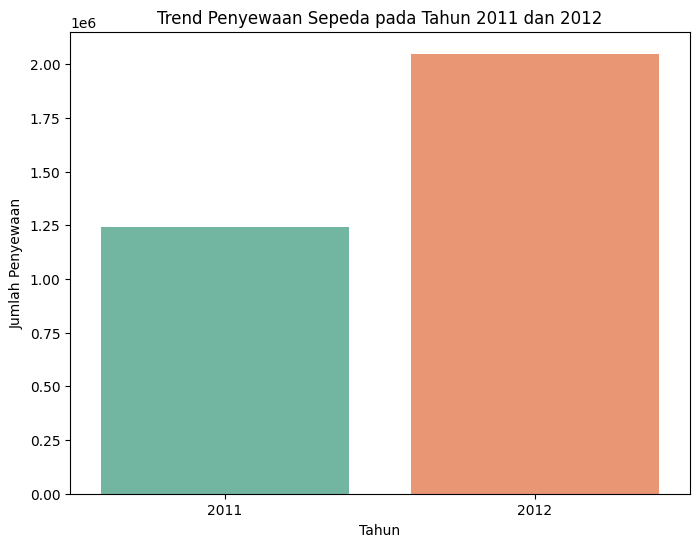

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(x=yearly_counts['year'], y=yearly_counts['cnt'], palette="Set2")
plt.title("Trend Penyewaan Sepeda pada Tahun 2011 dan 2012")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penyewaan")
plt.show()

Dari visualisasi ini, terlihat bahwa penyewaan sepeda mengalami kenaikan yang signifikan dari Tahun 2011 ke Tahun 2012

### Jumlah penyewaan sepeda berdasarkan Bulan

C:\Users\DELL\AppData\Local\Temp\ipykernel_1420\518830807.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='mnth', y='cnt', data=mnth_counts_2011, palette="Blues_d")
C:\Users\DELL\AppData\Local\Temp\ipykernel_1420\518830807.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='mnth', y='cnt', data=mnth_counts_2012, palette="Greens_d")


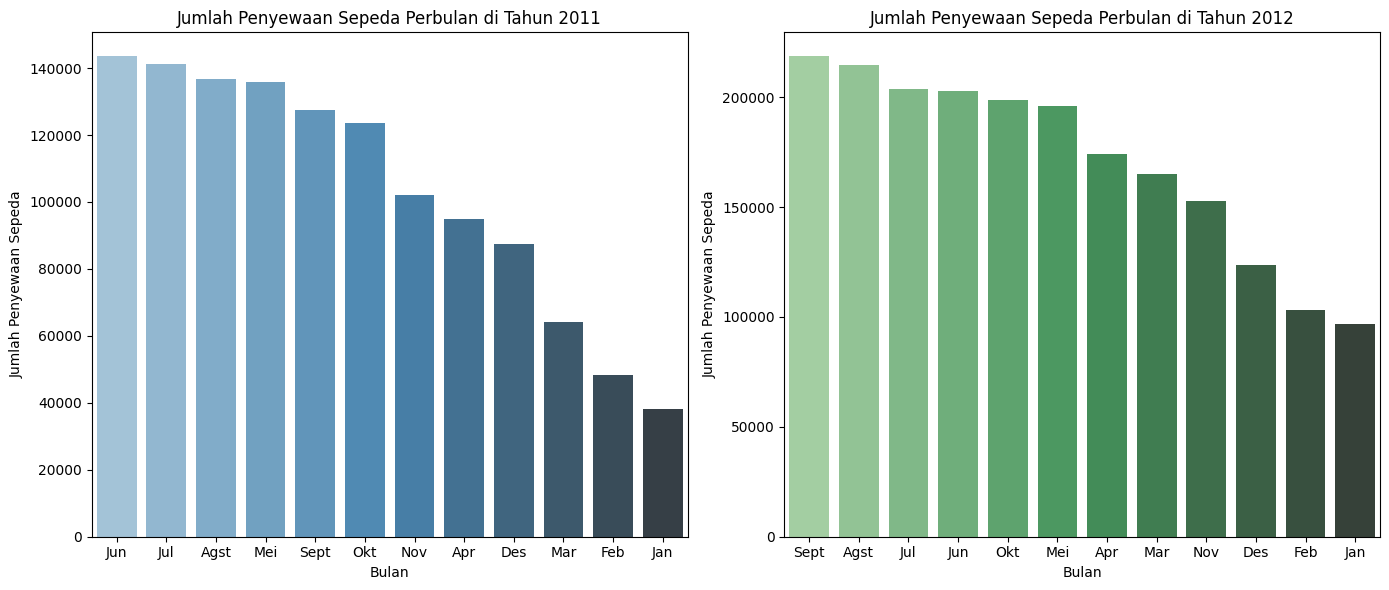

In [61]:
# Membuat figur dan dua subplot untuk perbandingan antara 2011 dan 2012
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot untuk Tahun 2011
sns.barplot(ax=axes[0], x='mnth', y='cnt', data=mnth_counts_2011, palette="Blues_d")
axes[0].set_title("Jumlah Penyewaan Sepeda Perbulan di Tahun 2011")
axes[0].set_xlabel("Bulan")
axes[0].set_ylabel("Jumlah Penyewaan Sepeda")

# Plot untuk Tahun 2012
sns.barplot(ax=axes[1], x='mnth', y='cnt', data=mnth_counts_2012, palette="Greens_d")
axes[1].set_title("Jumlah Penyewaan Sepeda Perbulan di Tahun 2012")
axes[1].set_xlabel("Bulan")
axes[1].set_ylabel("Jumlah Penyewaan Sepeda")

# Menampilkan visualisasi
plt.tight_layout()
plt.show() 

Dari visualisasi ini kita dapat meihat bahwa adanya perbedaan puncak penyewaan pada Tahun 2011 dan Tahun 2012, yaitu Bulan Juni untuk Tahun 2011 dan Bulan September di Tahun 2012. selain itu, kita juga dapat melihat peningkatan jumlah penyewaan sepeda dalam satu bulan juga meningkat secara signifikan di Tahun 2012.

### Jumlah penyewaan sepeda berdasarkan Hari Per Minggu 

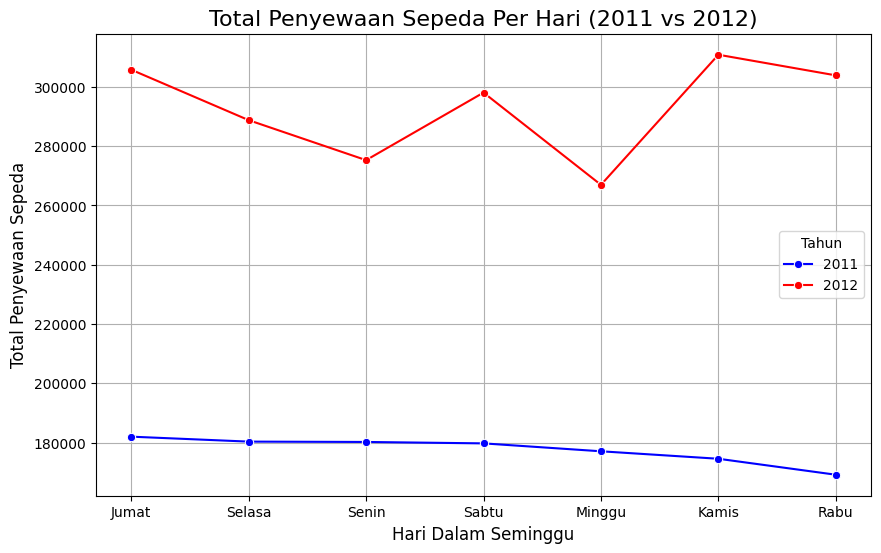

In [70]:
plt.figure(figsize=(10, 6))

# Membuat line plot untuk tahun 2011
sns.lineplot(data=day_counts_2011, x='weekday', y='cnt', marker='o', color='b', label='2011')

# Membuat line plot untuk tahun 2012
sns.lineplot(data=day_counts_2012, x='weekday', y='cnt', marker='o', color='r', label='2012')

# Menambahkan title dan label
plt.title('Total Penyewaan Sepeda Per Hari (2011 vs 2012)', fontsize=16)
plt.xlabel('Hari Dalam Seminggu', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)

# Menambahkan grid untuk kemudahan interpretasi
plt.grid(True)

# Menambahkan legend untuk membedakan antara 2011 dan 2012
plt.legend(title='Tahun')

# Menampilkan plot
plt.show()

Dari visualisasi ini dapat kita lihat bahwa gap antara jumlah penyewaan per hari di Tahun 2011 dan 2012 sangat jauh, ini menunjukan trend penyewaan sepeda yang meningkat . Pada Tahun 2011 puncaknya ada di Hari Jumat sedangkan di Tahun 2012 ada di Hari Kamis.

### Jumlah Penyewaan Sepeda Perjam Dalam Sehari

C:\Users\DELL\AppData\Local\Temp\ipykernel_1420\1352909798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Figure size 1200x600 with 0 Axes>

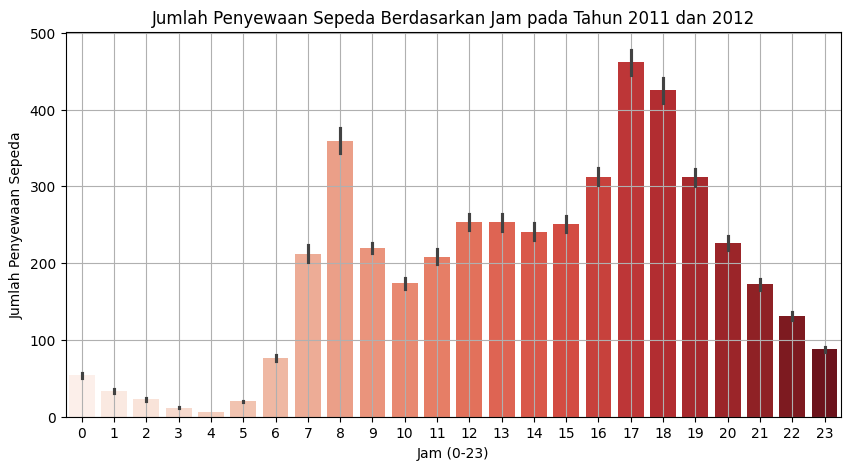

In [98]:
plt.figure(figsize=(12, 6))
plt.figure(figsize=(10,5))
sns.barplot(
    x = 'hr', 
    y = 'cnt', 
    data = hour_df, 
    palette = "Reds")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Jam pada Tahun 2011 dan 2012")
plt.xlabel("Jam (0-23)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid(True)
plt.show()

Dari visualisasi diatas kita dapat mengetahui bahwa saat sore hari di jam 17.00 - 18.00 dan pagi hari di jam 08.00 adalah puncak penyewaan sepeda dalam sehari.

## 2. Apakah Kondisi Cuaca dan Musim Tertentu Berpengaruh terhadap Tingkat Penyewaan Sepeda?

### Jumlah Penyewaan Sepeda Berdasarkan Cuaca

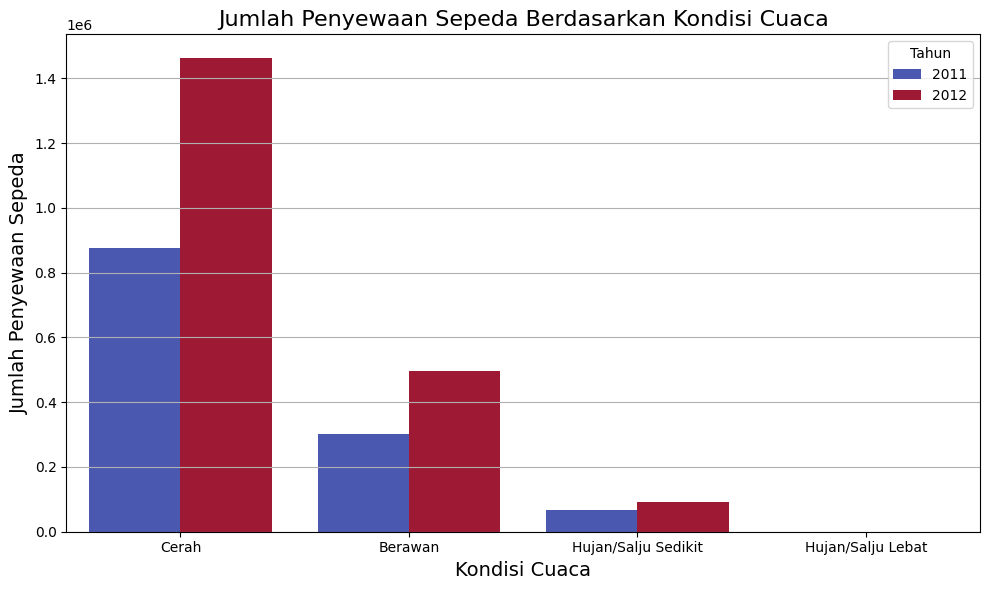

In [99]:
# Create DataFrames for your data
weather_counts_2011 = pd.DataFrame({
    'weathersit': ['Cerah', 'Berawan', 'Hujan/Salju Sedikit', 'Hujan/Salju Lebat'],
    'cnt': [875053, 300519, 67495, 36]
})

weather_counts_2012 = pd.DataFrame({
    'weathersit': ['Cerah', 'Berawan', 'Hujan/Salju Sedikit', 'Hujan/Salju Lebat'],
    'cnt': [1463120, 495433, 90836, 187]
})

# Add year information
weather_counts_2011['year'] = 2011
weather_counts_2012['year'] = 2012

# Combine the two DataFrames
combined_weather_counts = pd.concat([weather_counts_2011, weather_counts_2012], ignore_index=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', hue='year', data=combined_weather_counts, palette="coolwarm")

# Customize the plot
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca", fontsize=16)
plt.xlabel("Kondisi Cuaca", fontsize=14)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=14)
plt.grid(axis='y')
plt.legend(title='Tahun')
plt.tight_layout()

# Show the plot
plt.show()

Pada Tahun 2011 dan 2012, jumlah penyewaan sepeda paling tinggi adalah saat kondisi cuaca sedang cerah

# Jumlah Penyewaan Sepeda Berdasarkan Musim

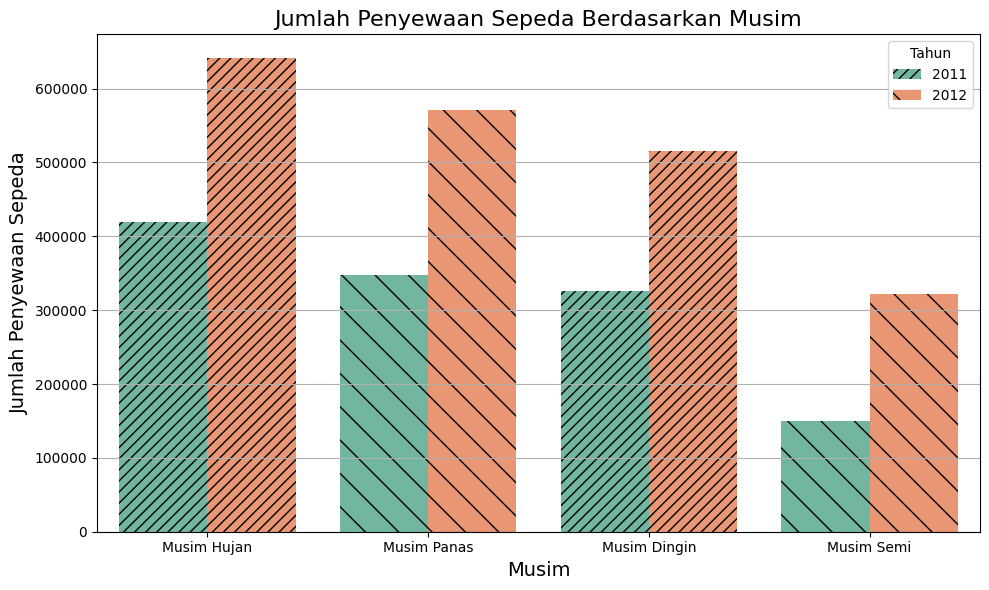

In [102]:
season_counts_2011 = pd.DataFrame({
    'season': ['Musim Hujan', 'Musim Panas', 'Musim Dingin', 'Musim Semi'],
    'cnt': [419650, 347316, 326137, 150000]
})

season_counts_2012 = pd.DataFrame({
    'season': ['Musim Hujan', 'Musim Panas', 'Musim Dingin', 'Musim Semi'],
    'cnt': [641479, 571273, 515476, 321348]
})

season_counts_2011['year'] = 2011
season_counts_2012['year'] = 2012
combined_season_counts = pd.concat([season_counts_2011, season_counts_2012], ignore_index=True)
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='season', y='cnt', hue='year', data=combined_season_counts, palette="Set2")
for i, bar in enumerate(bar_plot.patches):
    if i % 2 == 0:  
        bar.set_hatch('///')  
    else: 
        bar.set_hatch('\\') 
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim", fontsize=16)
plt.xlabel("Musim", fontsize=14)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=14)
plt.grid(axis='y')
plt.legend(title='Tahun')
plt.tight_layout()
plt.show()

Dikedua tahun, Musim Hujan adalah saat terbanyak sepeda disewahkan

# Conclusion 

Dari analisis yang telah dilakukan, kita dapat menyimpulkan beberapa hal sebagai insight dari analisis ini, yaitu :
- Terjadi peningkatan penyewaan sepeda yang signifikan dari Tahun 2011 ke Tahun 2012
- Di Tahun 2011 puncak penyewaan terjadi pada saat Musim Hujan, Kondisi Cuaca Cerah, di Bulan Juni, Hari Jumat dan Jam 17.00-18.00 di sore hari serta di jam 08.00 dipagi hari. 
- Sedangkan di Tahun 2011 puncak penyewaan terjadi pada saat Musim Hujan, Kondisi Cuaca Cerah, di Bulan September, Hari Kamis dan Jam 17.00-18.00 di sore hari serta di jam 08.00 dipagi hari. 